In [2]:
# Importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 188934989.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29373349.62it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 64870336.05it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2434572.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#Using prebuilt network

In [4]:
# Define a simple feedforward neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input: 28x28 image, Output: 128
        self.fc2 = nn.Linear(128, 64)      # Hidden layer: 128 -> 64
        self.fc3 = nn.Linear(64, 10)       # Output: 64 -> 10 (10 classes for MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:
accuracy = 0
for _ in range(10):
  # Initialize the model, loss function, and optimizer
  net = NeuralNetwork()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.01)
  num_epochs = 20

  # Training loop
  for epoch in range(num_epochs):  # Number of epochs
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          optimizer.zero_grad()  # Zero the parameter gradients

          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

  # Testing the model
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy += 100 * correct / total

print(f'Accuracy on the test set: {accuracy/10}%')

Epoch 1, Loss: 1.0646822637459363
Epoch 2, Loss: 0.38720336750245044
Epoch 3, Loss: 0.3243075942974101
Epoch 4, Loss: 0.28836062904804755
Epoch 5, Loss: 0.2613736704301669
Epoch 6, Loss: 0.23804650472393676
Epoch 7, Loss: 0.21692293654801623
Epoch 8, Loss: 0.19863236653827018
Epoch 9, Loss: 0.1835961265247196
Epoch 10, Loss: 0.16938360715741668
Epoch 11, Loss: 0.15786312079863318
Epoch 12, Loss: 0.14715269614837126
Epoch 13, Loss: 0.13790533942247885
Epoch 14, Loss: 0.12957727304224903
Epoch 15, Loss: 0.1229371245660539
Epoch 16, Loss: 0.11551207269051436
Epoch 17, Loss: 0.10946826861976687
Epoch 18, Loss: 0.10426557182109972
Epoch 19, Loss: 0.09908110249652537
Epoch 20, Loss: 0.09440222743358503
Epoch 1, Loss: 1.0615172446536612
Epoch 2, Loss: 0.38763429551744766
Epoch 3, Loss: 0.32492646702062855
Epoch 4, Loss: 0.29172241039621805
Epoch 5, Loss: 0.266019630382882
Epoch 6, Loss: 0.24413891439673616
Epoch 7, Loss: 0.2247397171210315
Epoch 8, Loss: 0.20816407508766854
Epoch 9, Loss: 0.1

# Using Custom neuron

In [8]:
# Making individual neuron
import torch.nn.init as init
class Neuron(torch.nn.Module):
    def __init__(self, input_neurons, output_neurons): # Defining the constructor to create Neuron object
        super(Neuron, self).__init__()
        self.input_neurons = input_neurons # Setting number of neurones connected for input
        self.output_neurons = output_neurons # Setting number of neurones connected for output
        xavier_scale = 1.0 / (input_neurons + output_neurons) # Calculate the Xavier initialization scale factor
        self.weights = nn.Parameter(init.xavier_uniform_(torch.Tensor(input_neurons, output_neurons))) # Initialize weights using Xavier initialization (uniform distribution)
        self.biases = nn.Parameter(torch.randn(output_neurons)) # Setting the biases (vector)

    # Defining the function for Forward Propagation
    def forward(self, input):
        z = torch.matmul(input, self.weights) + self.biases # Carrying out: z = X.W + b
        return z

In [9]:
# Define a simple feedforward neural network
class CustomNeuralNetwork(nn.Module):
    def __init__(self):
        super(CustomNeuralNetwork, self).__init__()
        self.input_layer = Neuron(28 * 28, 128)  # Input: 28x28 image, Output: 128
        self.hidden_layer = Neuron(128, 64)      # Hidden layer: 128 -> 64
        self.output_layer = Neuron(64, 10)       # Output: 64 -> 10 (10 classes for MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

In [10]:
accuracy1 = 0
for _ in range(10):
  # Initialize the model, loss function, and optimizer
  net2 = CustomNeuralNetwork()
  criterion2 = nn.CrossEntropyLoss()
  optimizer2 = optim.SGD(net2.parameters(), lr=0.01)

  # Training loop
  for epoch in range(num_epochs):  # Number of epochs
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data

          optimizer2.zero_grad()  # Zero the parameter gradients

          outputs = net2(inputs)

          loss = criterion2(outputs, labels)
          loss.backward()
          optimizer2.step()

          running_loss += loss.item()

      # print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

  # Testing the model
  correct = 0
  total = 0
  with torch.no_grad():
      for data in trainloader:
          images, labels = data
          outputs = net2(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy1 += 100 * correct / total

print(f'Accuracy on the test set: {accuracy1/10}%')

Epoch 1, Loss: 0.5861549405877524
Epoch 2, Loss: 0.3164207722697812
Epoch 3, Loss: 0.27022529382314253
Epoch 4, Loss: 0.23735887666087924
Epoch 5, Loss: 0.21158934520410577
Epoch 6, Loss: 0.1905054537488072
Epoch 7, Loss: 0.1735190909320135
Epoch 8, Loss: 0.15971598802392545
Epoch 9, Loss: 0.14787442533017348
Epoch 10, Loss: 0.13683557060997942
Epoch 11, Loss: 0.12808327107970266
Epoch 12, Loss: 0.12033230087844961
Epoch 13, Loss: 0.1126204323488226
Epoch 14, Loss: 0.10667527747004907
Epoch 15, Loss: 0.10018934212676657
Epoch 16, Loss: 0.0953339385186463
Epoch 17, Loss: 0.09003346243491972
Epoch 18, Loss: 0.08587408634617544
Epoch 19, Loss: 0.0818186689650755
Epoch 20, Loss: 0.07796278448531162
Epoch 1, Loss: 0.5834488441853889
Epoch 2, Loss: 0.30579027047416546
Epoch 3, Loss: 0.25977185458691515
Epoch 4, Loss: 0.22995392492473887
Epoch 5, Loss: 0.20763700451058492
Epoch 6, Loss: 0.18967604011630834
Epoch 7, Loss: 0.1742737848978879
Epoch 8, Loss: 0.1617585782851301
Epoch 9, Loss: 0.15

#Using ADAM optimizer


In [11]:
accuracy2 = 0
for _ in range(10):
  # Initialize the model, loss function, and optimizer
  net3 = CustomNeuralNetwork()
  criterion3 = nn.CrossEntropyLoss()
  optimizer3 = optim.Adam(net3.parameters(), lr=0.01)  # Use Adam optimizer

  for epoch in range(num_epochs):
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          optimizer3.zero_grad()
          outputs = net3(inputs)
          loss = criterion3(outputs, labels)
          loss.backward()
          optimizer3.step()
          running_loss += loss.item()
      # print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

  # Testing the model
  correct = 0
  total = 0
  with torch.no_grad():
      for data in trainloader:
          images, labels = data
          outputs = net3(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy2 += 100 * correct / total

print(f'Accuracy on the test set: {accuracy2/10}%')

Epoch 1, Loss: 0.42507387465759633
Epoch 2, Loss: 0.24384682282988132
Epoch 3, Loss: 0.23275366077807222
Epoch 4, Loss: 0.2211488114961826
Epoch 5, Loss: 0.21590695782566566
Epoch 6, Loss: 0.19992018235859269
Epoch 7, Loss: 0.20362324524682754
Epoch 8, Loss: 0.19119056466537943
Epoch 9, Loss: 0.19122110850521243
Epoch 10, Loss: 0.18824672815538862
Epoch 11, Loss: 0.18739568297939896
Epoch 12, Loss: 0.18424370973460327
Epoch 13, Loss: 0.17926120556898908
Epoch 14, Loss: 0.17586376555839867
Epoch 15, Loss: 0.16922544758431296
Epoch 16, Loss: 0.1786421149977044
Epoch 17, Loss: 0.1743166942833496
Epoch 18, Loss: 0.16778737585644113
Epoch 19, Loss: 0.17246437602853185
Epoch 20, Loss: 0.16727701385122246
Epoch 1, Loss: 0.42543609423844864
Epoch 2, Loss: 0.2493167309793455
Epoch 3, Loss: 0.22991867610878908
Epoch 4, Loss: 0.22224081504637244
Epoch 5, Loss: 0.2131222033960574
Epoch 6, Loss: 0.21052910514306952
Epoch 7, Loss: 0.19689865508523863
Epoch 8, Loss: 0.19742835374789308
Epoch 9, Loss:

#Using Orthogonal Initialization

In [5]:
# Making individual neuron
import torch.nn.init as init
class Neuron2(torch.nn.Module):
    def __init__(self, input_neurons, output_neurons): # Defining the constructor to create Neuron object
        super(Neuron2, self).__init__()
        self.input_neurons = input_neurons # Setting number of neurones connected for input
        self.output_neurons = output_neurons # Setting number of neurones connected for output
        self.weights = nn.Parameter(init.orthogonal_(torch.Tensor(input_neurons, output_neurons))) # Initialize weights using Orthogonal initialization
        self.biases = nn.Parameter(torch.randn(output_neurons)) # Setting the biases (vector)

    # Defining the function for Forward Propagation
    def forward(self, input):
        z = torch.matmul(input, self.weights) + self.biases # Carrying out: z = X.W + b
        return z

In [6]:
# Define a simple feedforward neural network
class CustomNeuralNetwork2(nn.Module):
    def __init__(self):
        super(CustomNeuralNetwork2, self).__init__()
        self.input_layer = Neuron2(28 * 28, 128)  # Input: 28x28 image, Output: 128
        self.hidden_layer = Neuron2(128, 64)      # Hidden layer: 128 -> 64
        self.output_layer = Neuron2(64, 10)       # Output: 64 -> 10 (10 classes for MNIST)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.input_layer(x))
        x = torch.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        return x

In [14]:
accuracy3 = 0
for _ in range(10):
  # Initialize the model, loss function, and optimizer
  net4 = CustomNeuralNetwork2()
  criterion4 = nn.CrossEntropyLoss()
  optimizer4 = optim.SGD(net4.parameters(), lr=0.01)  # Use Adam optimizer

  for epoch in range(num_epochs):
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          optimizer4.zero_grad()
          outputs = net4(inputs)
          loss = criterion4(outputs, labels)
          loss.backward()
          optimizer4.step()
          running_loss += loss.item()
      # print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

  # Testing the model
  correct = 0
  total = 0
  with torch.no_grad():
      for data in trainloader:
          images, labels = data
          outputs = net4(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy3 += 100 * correct / total

print(f'Accuracy on the test set: {accuracy3/10}%')

Epoch 1, Loss: 0.654400236571013
Epoch 2, Loss: 0.3296374770036257
Epoch 3, Loss: 0.2835764469844954
Epoch 4, Loss: 0.2533521699204819
Epoch 5, Loss: 0.22870965487063566
Epoch 6, Loss: 0.20814303872681883
Epoch 7, Loss: 0.19052487848870664
Epoch 8, Loss: 0.1751789663102168
Epoch 9, Loss: 0.16220460870245626
Epoch 10, Loss: 0.15087633522779448
Epoch 11, Loss: 0.1413251772852563
Epoch 12, Loss: 0.13302274960587654
Epoch 13, Loss: 0.1248308756370852
Epoch 14, Loss: 0.11787993299252571
Epoch 15, Loss: 0.1118492706994544
Epoch 16, Loss: 0.10580527020205281
Epoch 17, Loss: 0.10038793424684514
Epoch 18, Loss: 0.09614151281251042
Epoch 19, Loss: 0.0913617080921478
Epoch 20, Loss: 0.08733758848331281
Epoch 1, Loss: 0.6924910148514359
Epoch 2, Loss: 0.3449405142620428
Epoch 3, Loss: 0.2980269226136365
Epoch 4, Loss: 0.2671767440972044
Epoch 5, Loss: 0.24157664882761837
Epoch 6, Loss: 0.2195204207137513
Epoch 7, Loss: 0.20013748774571077
Epoch 8, Loss: 0.18339167738249942
Epoch 9, Loss: 0.1687572

#Adam and Orthogonal

In [8]:
accuracy4 = 0
for _ in range(10):
  # Initialize the model, loss function, and optimizer
  net5 = CustomNeuralNetwork2()
  criterion5 = nn.CrossEntropyLoss()
  optimizer5 = optim.Adam(net5.parameters(), lr=0.01)  # Use Adam optimizer
  num_epochs = 20

  for epoch in range(num_epochs):
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          optimizer5.zero_grad()
          outputs = net5(inputs)
          loss = criterion5(outputs, labels)
          loss.backward()
          optimizer5.step()
          running_loss += loss.item()
      # print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

  # Testing the model
  correct = 0
  total = 0
  with torch.no_grad():
      for data in trainloader:
          images, labels = data
          outputs = net5(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy4 += 100 * correct / total

print(f'Accuracy on the test set: {accuracy4/10}%')

Accuracy on the test set: 95.97733333333333%


#Benchmarking

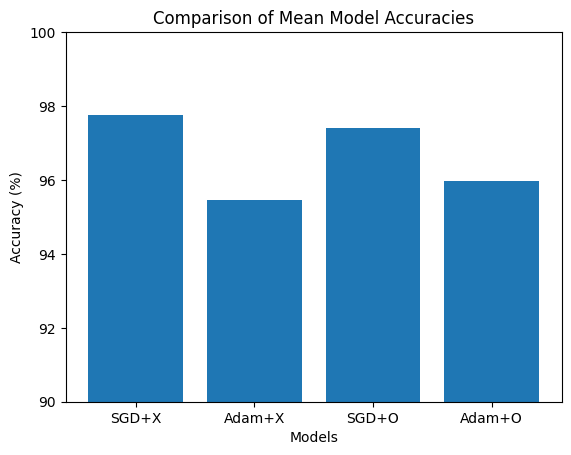

In [13]:
# Create a bar chart to compare accuracies
accuracy1 = 97.76166666666666
accuracy2 = 95.45366666666665
accuracy3 = 97.41366666666666
accuracy4 = 95.97733333333333

import matplotlib.pyplot as plt
models = ['SGD+X','Adam+X','SGD+O','Adam+O']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Mean Model Accuracies')
plt.ylim(90, 100)  # Set the y-axis range from 0% to 100%
plt.show()